# Update-Heavy but Enrolment-Light Regions

In [1]:
from book1 import district_df

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Compute Update Pressure Metrics

In [2]:
district_df["total_updates"] = (
    district_df["demo_activity"] +
    district_df["bio_activity"]
)

district_df["update_to_enrolment_ratio"] = (
    district_df["total_updates"] /
    district_df["total_enrolments"].replace(0, np.nan)
)

In [3]:
district_df[
    ["state", "district", "total_enrolments", "total_updates", "update_to_enrolment_ratio"]
].describe()

,total_enrolments,total_updates,update_to_enrolment_ratio
count,1070.000000,1.070000e+03,1070.000000
mean,5080.095327,1.112671e+05,27.295230
std,6505.149535,1.345247e+05,34.982683
min,1.000000,0.000000e+00,0.000000
25%,456.000000,5.859500e+03,14.530226
50%,2745.500000,6.246300e+04,22.486428
75%,7044.000000,1.696972e+05,33.165059
max,43688.000000,1.044240e+06,603.000000


## Identify Update-Heavy

In [4]:
ratio_threshold = district_df["update_to_enrolment_ratio"].quantile(0.90)

update_heavy = district_df[
    district_df["update_to_enrolment_ratio"] >= ratio_threshold
].sort_values("update_to_enrolment_ratio", ascending=False)

In [5]:
update_heavy.head(10)

,state,district,total_enrolments,demo_activity,bio_activity,total_activity,activity_per_enrolment,total_updates,update_to_enrolment_ratio
867,Telangana,Medchal?malkajgiri,2,350.0,856.0,1208.0,604.000000,1206.0,603.000000
754,Rajasthan,Beawar,1,510.0,8.0,519.0,519.000000,518.0,518.000000
750,Rajasthan,Balotra,1,503.0,6.0,510.0,510.000000,509.0,509.000000
767,Rajasthan,Didwana-Kuchaman,2,720.0,8.0,730.0,365.000000,728.0,364.000000
785,Rajasthan,Salumbar,1,213.0,1.0,215.0,215.000000,214.0,214.000000
212,Daman & Diu,Daman,9,377.0,1412.0,1798.0,199.777778,1789.0,198.777778
524,Maharashtra,Ahilyanagar,13,2418.0,17.0,2448.0,188.307692,2435.0,187.307692
764,Rajasthan,Deeg,8,1051.0,16.0,1075.0,134.375000,1067.0,133.375000
587,Manipur,Thoubal,1067,59244.0,56043.0,116354.0,109.047798,115287.0,108.047798
580,Manipur,Imphal East,1132,56020.0,59274.0,116426.0,102.849823,115294.0,101.849823


## Visualization: Ratio-Based Stress

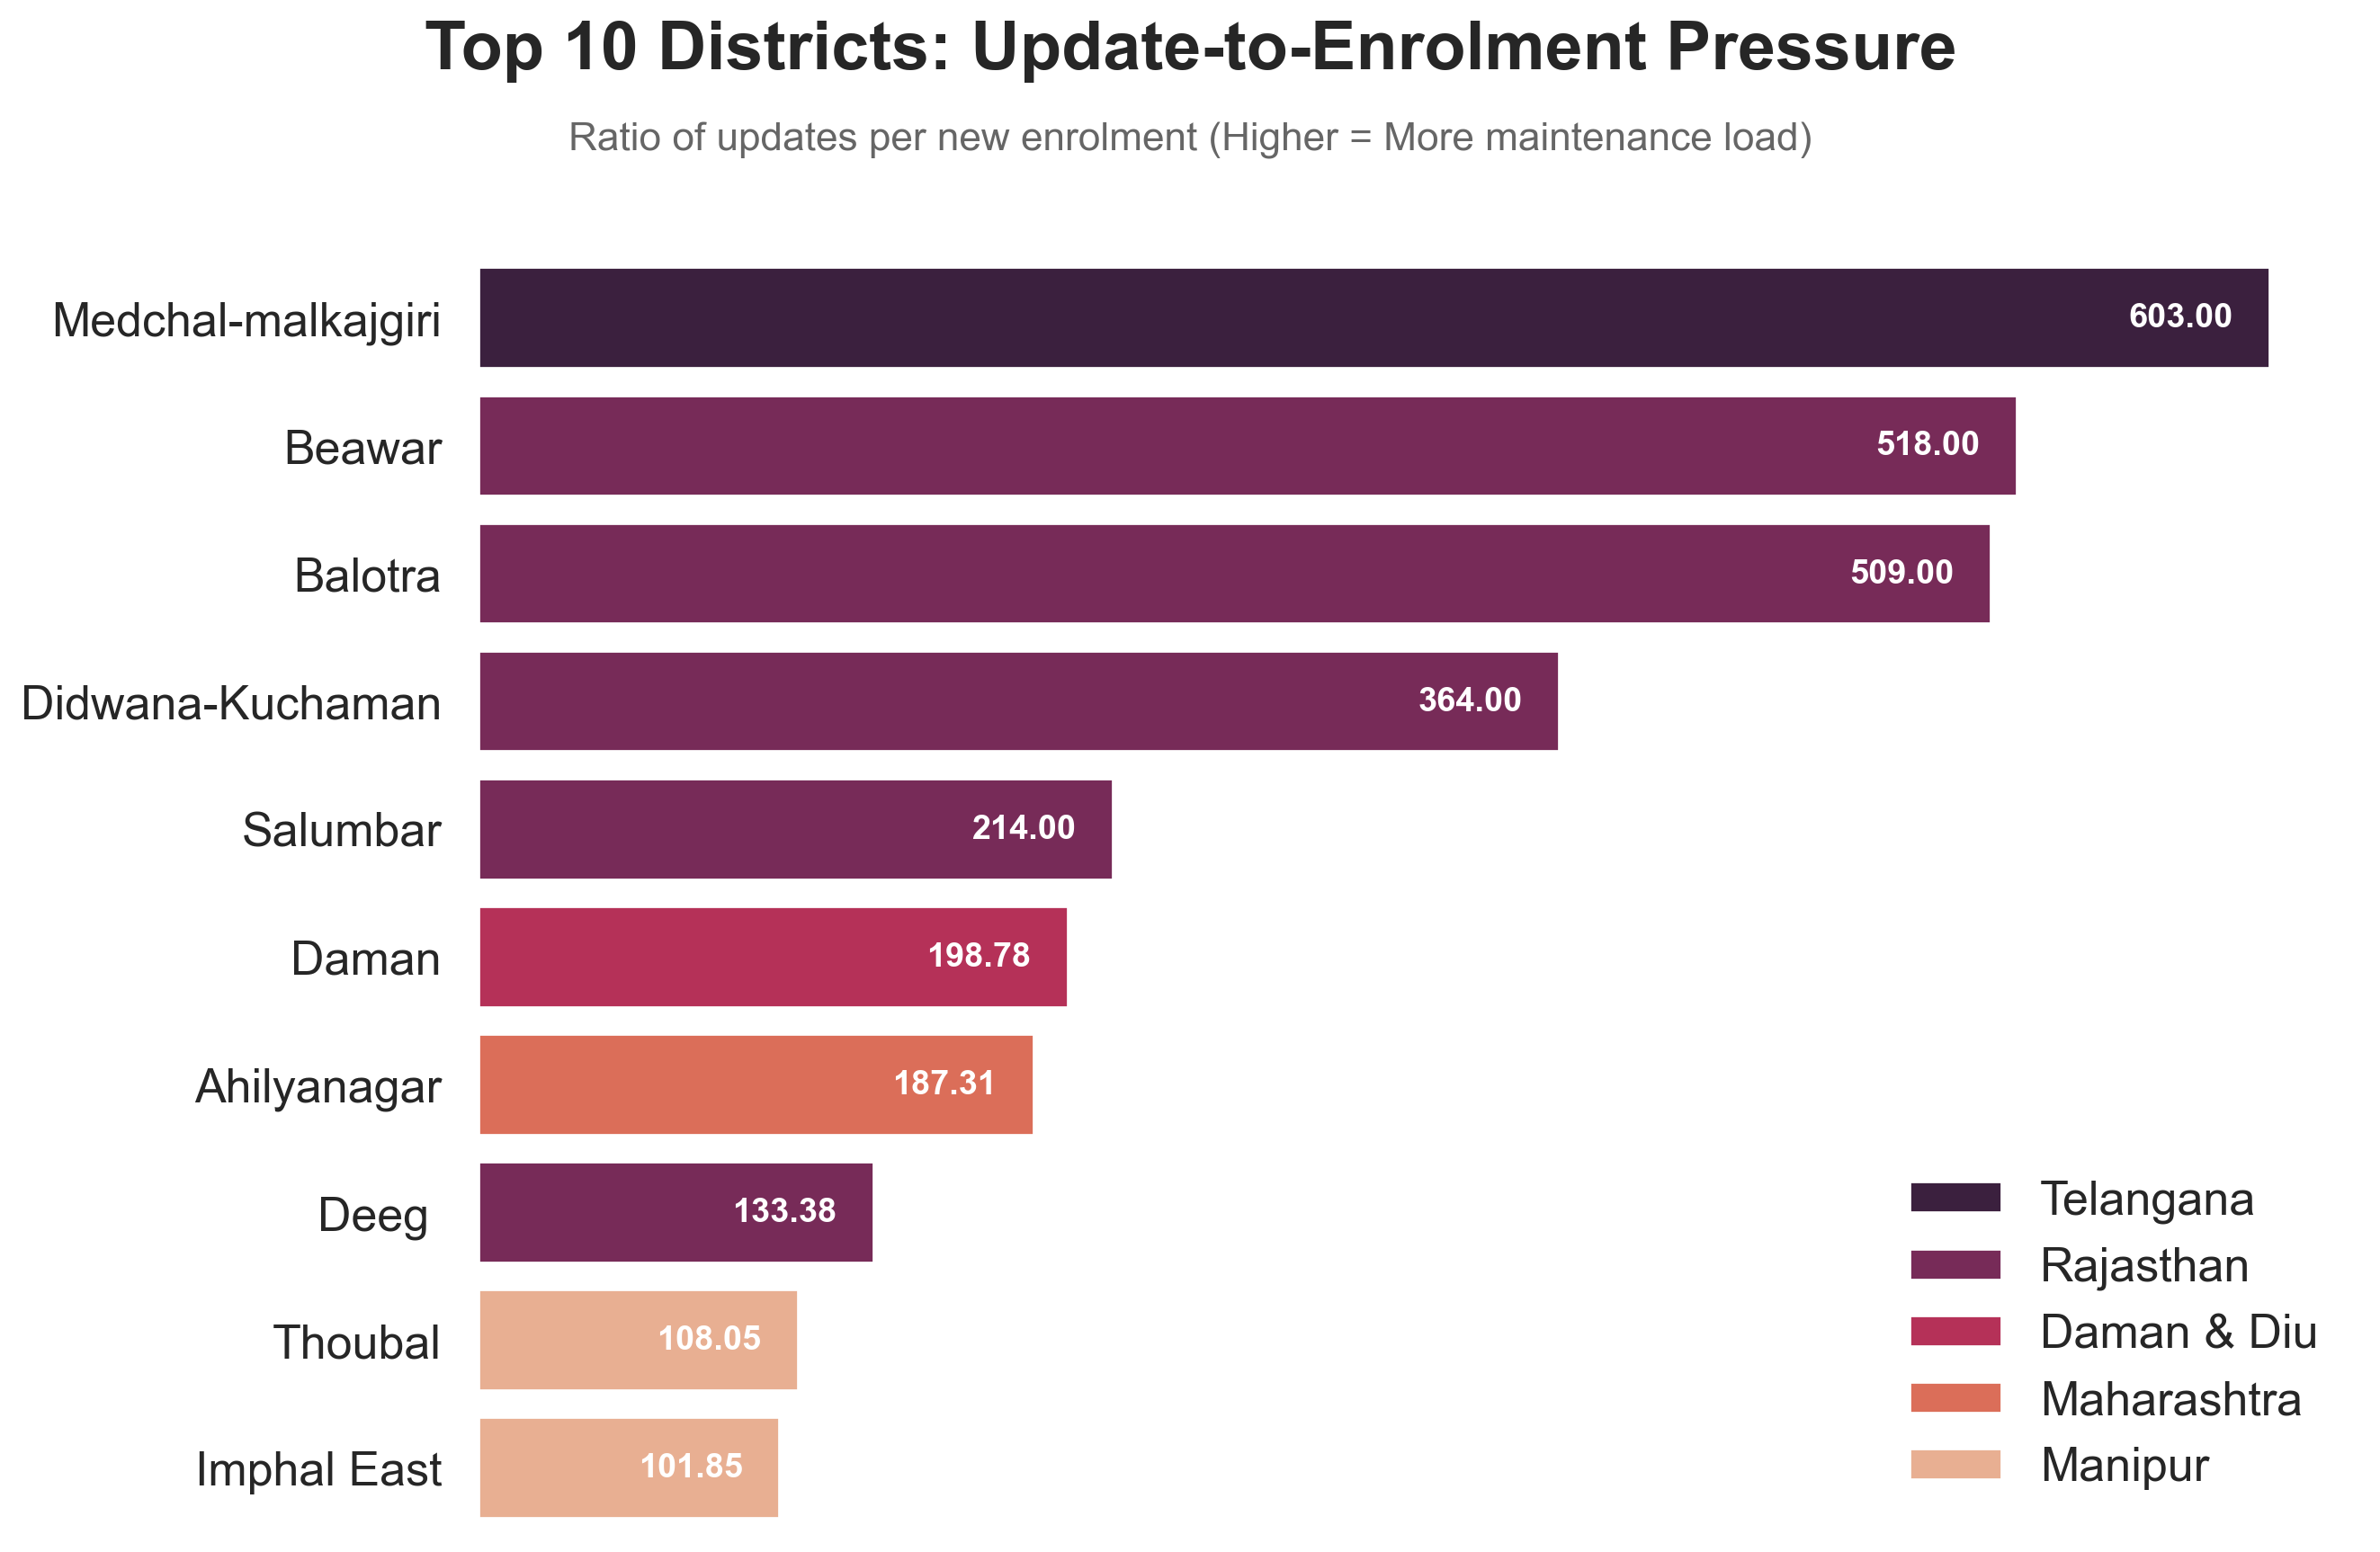

In [16]:
sns.set_context("talk")
sns.set_style("white")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 227

# Fix the Warning: Use .copy() to create a standalone table
top10_ratio = update_heavy.head(10).copy()

# This fixes "Medchal?malkajgiri" -> "Medchal-Malkajgiri"
if 'district' in top10_ratio.columns:
    top10_ratio['district'] = top10_ratio['district'].astype(str).str.replace('?', '-')

# Create the Plot
ax = sns.barplot(
    data=top10_ratio,
    y="district",
    x="update_to_enrolment_ratio",
    hue="state",
    palette="rocket",
    dodge=False
)

# --- CENTER ALIGNED TITLES ---
plt.figtext(0.5, 0.93, "Top 10 Districts: Update-to-Enrolment Pressure", 
            fontsize=24, weight='bold', ha='center')

plt.figtext(0.5, 0.88, "Ratio of updates per new enrolment (Higher = More maintenance load)", 
            fontsize=14, color='#666666', ha='center')

# Add Data Labels (White text inside bars)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=-50, fontsize=12, color='white', weight='bold')

# Clean Axes
plt.xlabel("")
plt.ylabel("")
plt.xticks([]) 
sns.despine(left=True, bottom=True)

# --- LEGEND LOWER RIGHT ---
sns.move_legend(
    ax, "lower right",
    bbox_to_anchor=(1, 0), 
    title="",
    frameon=False,
)

# THE LAYOUT FIX
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

## Contrast Check

In [17]:
district_df.sort_values(
    "total_enrolments", ascending=False
)[
    ["state", "district", "total_enrolments", "update_to_enrolment_ratio"]
].head(10)

,state,district,total_enrolments,update_to_enrolment_ratio
572,Maharashtra,Thane,43688,23.313633
160,Bihar,Sitamarhi,42232,8.331313
910,Uttar Pradesh,Bahraich,39338,7.900122
1044,West Bengal,Murshidabad,35911,16.458244
1057,West Bengal,South 24 Parganas,33540,18.657156
563,Maharashtra,Pune,31763,32.875988
771,Rajasthan,Jaipur,31146,20.266615
397,Karnataka,Bengaluru,30980,19.399580
983,Uttar Pradesh,Sitapur,30854,14.054353
164,Bihar,West Champaran,30438,13.148236


## Insight: Update-Heavy but Enrolment-Light Regions

### Several districts exhibit update activity that is disproportionately high relative to their enrolment volume.

This indicates that operational load in these regions is driven primarily by
identity maintenance rather than new enrolments.

Such districts require:
- Update-focused infrastructure planning
- Capacity allocation based on lifecycle load, not population size

This insight is derived entirely from relative, aggregated metrics and avoids
assumptions about individual behavior.